  ## Funciones de base radial

Las funciones de base radial (RBF) se originaron para dar solución al problema de interpolación exacta en varias variables

- Son funciones cuya salida depende de la distancia a un punto denominado **centro**
- Son funciones simétricas con respecto a 0
- Se definen al menos dos parámetros:
 - Centro: Punto donde la función posee un máximo
 - Anchura: Magnitud de la variación de la función según cuanto se aleja del centro.

#### Definiciones

- Se tiene un modelo similar al perceptron multicapa
- La capa de entrada recibe señales y no realiza ningun procesamiento
- Capa oculta: Realiza una transformacion local de las entradas y no lineal de esas señales, a diferencia de perceptron
- Capa de salida:  Se realiza una combinación lineal de las activaciones de las neuronas de la capa oculta y actúa como salida de la red

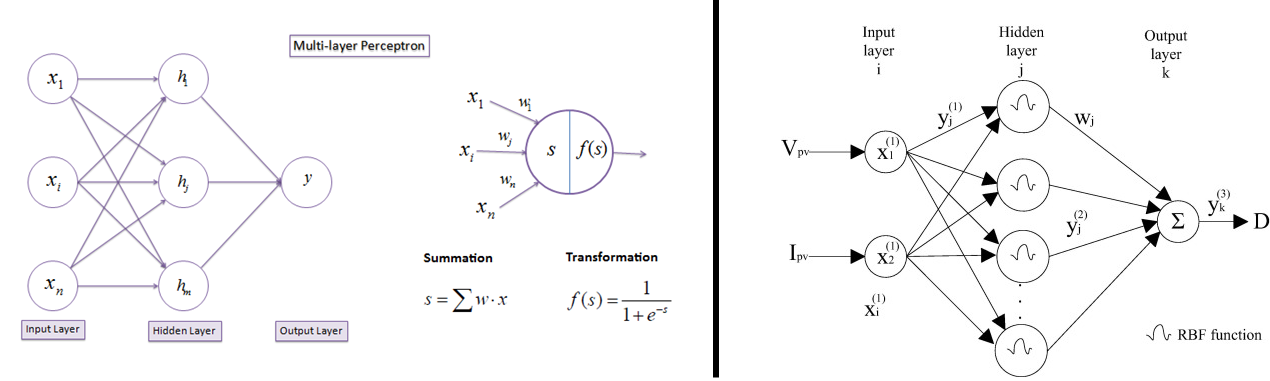

La técnica de funciones de base radial presenta un conjunto de N funciones base, una para cada dato, de la forma φ(||x − x^n||), donde φ es una función no lineal, x es un conjunto de entrada. Así, la n-ésima función base dependerá de la distancia ||x − x^n||, usualmente euclídea, entre x y x^n.
La salida de la aplicación será una combinación lineal de las funciones base
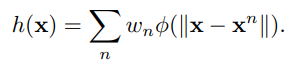

Tanto estudios teóricos como los empíricos han mostrado que, a efectos del problema de interpolación, muchas propiedades de la función interpolante son independendientes de la forma precisa de la función no lineal φ. En la literatura se han ensayado varias posibilidades para φ, pero la eleccion mas frecuente es la función gaussiana

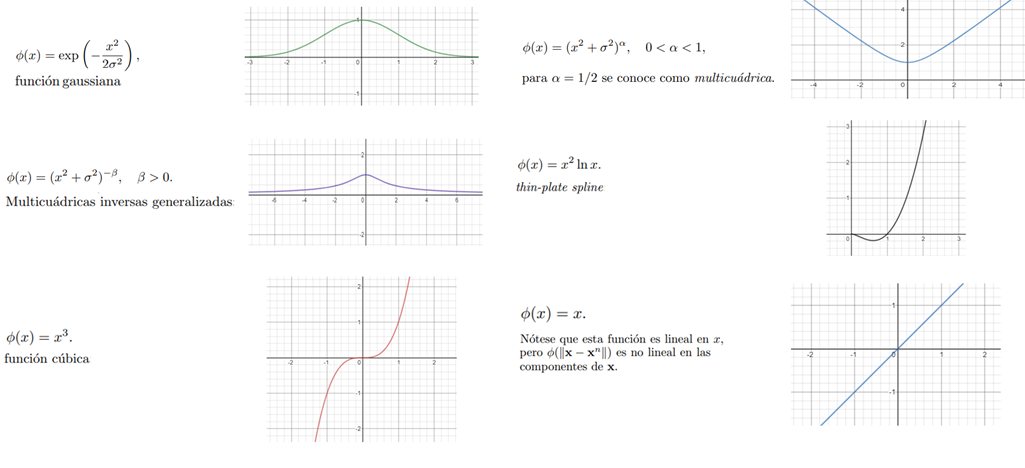

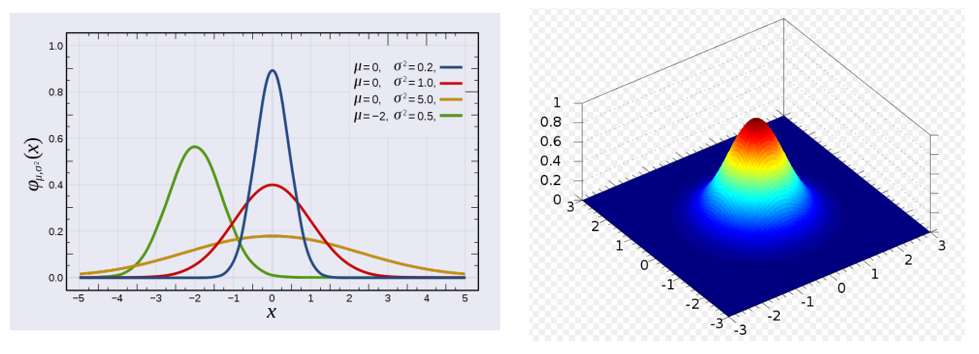

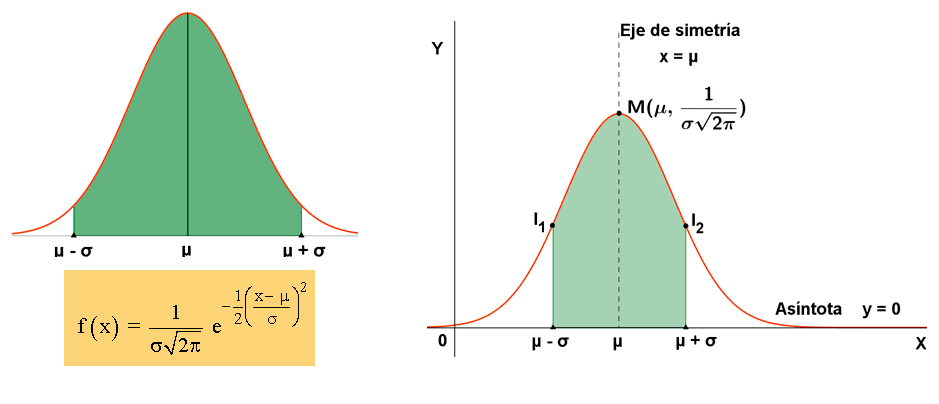

Las combinaciones lineales de funciones base radiales proporcionan un interpolante que pasa exactamente por cada uno de
los puntos del conjunto de datos. Si los datos presentan distorsión entonces el interpolante es típicamente, una función muy oscilante; en tal caso, se deberá elegir como interpolante otra función que sea más suave y promedie el ruido de los datos. Una limitaci´on adicional del procedimiento de interpolación.
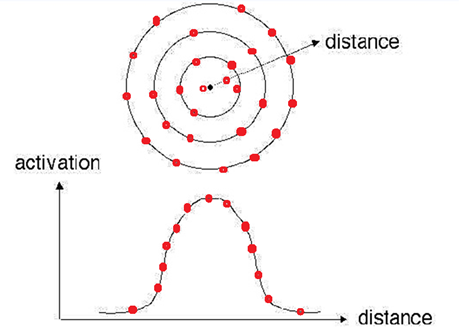

la inclusión de las funiones de base radiales interpolan de forma suave los datos, donde el número de funciones base está determinado por la complejidad de la función a representar, más que por el tamaño del conjunto de datos. 

### Arquitectura de una RBFN

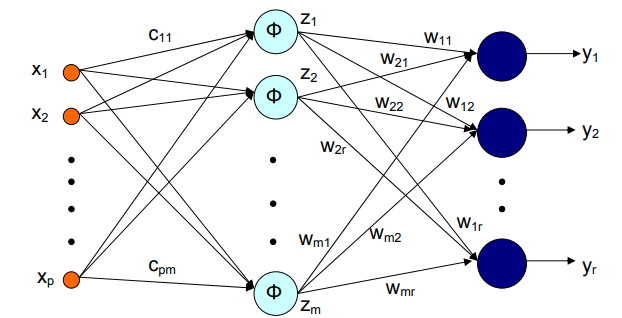

- Capa de entrada: reciben las señales, no realizan ningún preprocesado.
- Capa Oculta: reciben las señales de la capa de entrada y realizan una transformación local y no lineal sobre dichas señales (Diferencia con el MLP).
- Capa de Salida: Se realiza una combinación lineal de las activaciones de las neuronas de la capa oculta y actúa como salida de la red.

**Capa de salida**

- Cada elemento procesado calcula su valor neto como unacombinación lineal de las salidas de la capa oculta
- Para un patrón dado [x1, x2, ..., xn] la salida cada elemento k de la capa de salida se obtiene como:

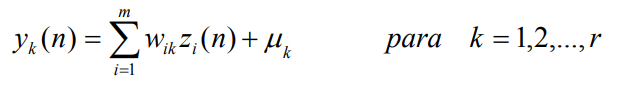

Donde wik son los pesos asociados a cada elemento k de la salida y el elemento i de la capa oculta y zi(n) son las salidas
procesadas obtenidas de la capa oculta. En total tenemos m neuronas en la capa oculta y r en la capa de salida. uk es el
umbral de cada neurona de salida.


**Capa oculta**

Cada elemento procesado i, de la capa oculta tiene asociada una función de base radial de tal manera que representa una clase o categoría, donde dicha clase viene dada por (Ci, di).

Ci representa un centro de cluster (pesos asociados a cada neurona i) y di representa la desviación o dilatación de la función de base radial asociada a dicho elemento.

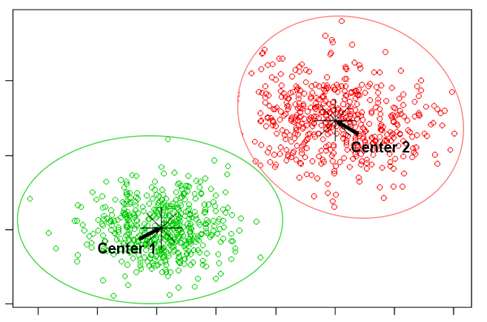

La salida de cada elemento de la capa oculta zi(n) se calcula como la distancia que existe ente el patrón de entrada X(n) al centro del cluster Ci ponderada inversamente por di y aplicando después a ese valor una función de base radial. 

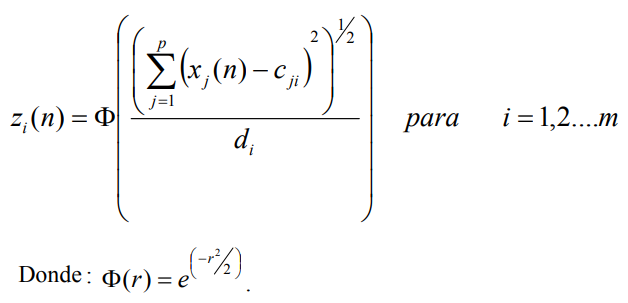

Las funciones de base radial tienen todas ellas un carácter Local pues son funciones que alcanzan un nivel cercano al máximo de su recorrido cuando el patrón de entrada x(n) está próximo al centro de la neurona. A medida que el patrón se aleja del centro, el valor de la función va tendiendo al valor mínimo de su recorrido.

Las salidas de las redes de neuronas de base radial son, por tanto una combinación lineal de gausianas, cada una de las cuales se activa para una determinada porción del espacio definido por los patrones de entrada. 

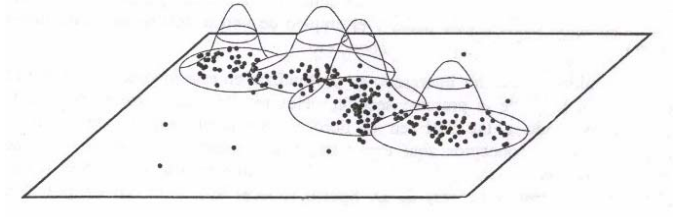

El entrenamiento de este tipo de redes, determina todos los parámetros de la red.

- Parámetros de la capa de salida: Pesos, W
- Parámetros de la capa Oculta: Centros, C y desviaciones asociadas d.

La determinación de los parámetros de la capa oculta, se realiza mediante la optimización en el espacio de entradas, ya que cada neurona va a representar una zona diferente en dicho espacio.

#### Aprendizaje Híbrido

- Fase No supervisada: Determinación de parámetros de la capa oculta.
- Fase Supervisada: Determinación de pesos en capa de salida.

### Fase No supervisada

1.Determinación de centros:

- Algoritmo K-mens
- Mapas de Kohonen

**Algoritmo K-means**

- Es un algoritmo de agrupamiento, permite generar la partición de un conjunto de n datos en k grupos
- En RBF se requeriere para calcular los centros en la técnica de aprendizaje híbrido
- Algoritmo:
    - Inicialmente, se calculan los k centros aleatoriamente ci = (x1, x2, ...., xn)
    - Se toman las distancias a cada uno de los puntos de entrada y se asigna al centro más cercano
    - Si los centros son distintos a los iniciales, se vuelve a realizar el proceso
    - El algoritmo se detiene cuando no hay cambio en los centros

**Ejemplo**

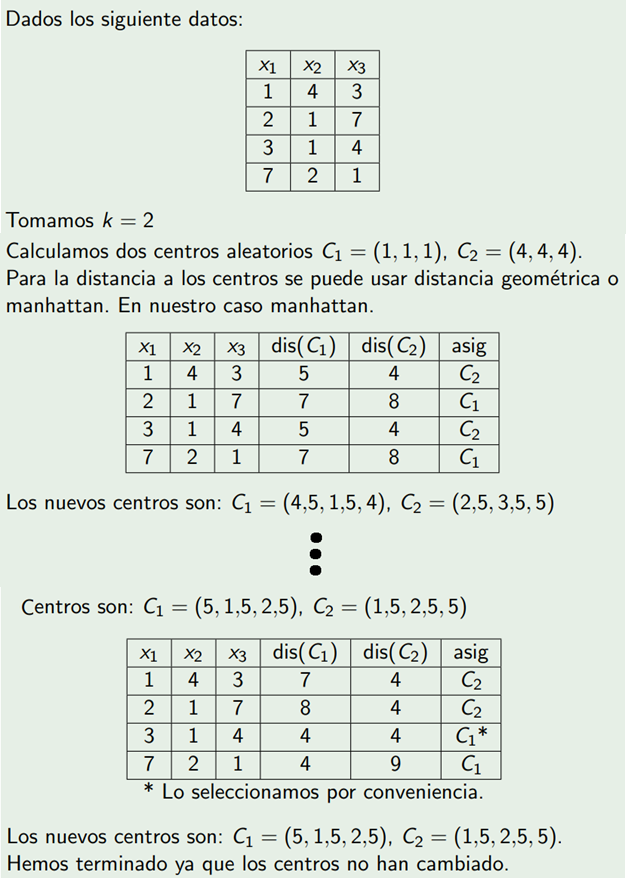

2.Determinacion de desviaciones:

Se deben de calcular de manera que cada neurona de la capa oculta se active en una región del espacio de entradas y de manera que el solapamiento de las zonas de activación de una neurona sea lo más ligero posible, para suavizar así la interpolación.

Se tienen varias aproximaciones:
- Media Uniforme de las distancias euclídeas del centro Ci a los p centros más cercanos. 
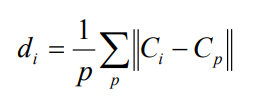

- Media geométrica de la distancia del centro a sus dos vecinos más cercanos.
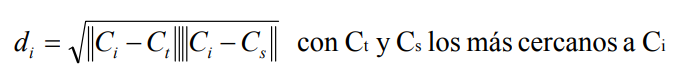

### Fase supervisada

- Se utiliza la técnica de corrección del error que se usa en Adeline o MLP
- Minimización del error cuadrático medio

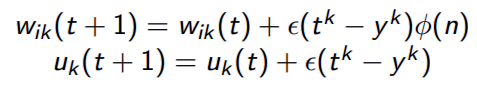

Donde 𝜖 es el factor de entrenamiento, uk es el umbral, tk es la salida deseada, wik es el peso y yk es la salida obtenida.

### Aprendizaje totalmente supervisado

En este caso, todos los parámetros de la red, centros, amplitudes, pesos y umbrales, se determinan de manera completamente supervisada y con el objetivo de minimizar el error cuadrático medio.

En este proceso, en ningún momento se tiene en cuenta que las amplitudes alcancen valores tales que el solapamiento de las activaciones de las neuronas de la capa oculta sea lo más suave posible. Así que en principio, esa característica de localidad se puede perder.

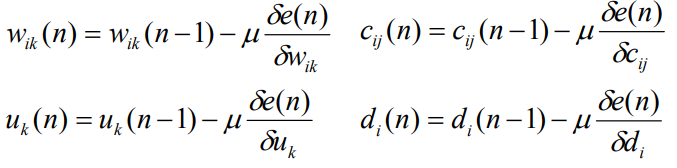

**Comparación**

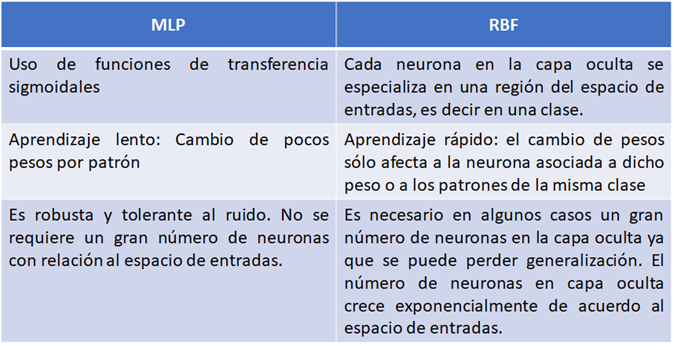